<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" style="height:450px;" width=500/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>
<h3 style="text-align: center;"><b>Базовый поток. Осень 2020</b></h3>

<h1 style="text-align: center;"><b>Неделя 1. Библиотека Pandas</b></h1>

Библиотека `pandas` активно используется в современном data science для работы с данными, которые могут быть представлены в виде таблиц (а это очень, очень большая часть данных)

`pandas` есть в пакете Anaconda, но если вдруг у Вас её по каким-то причинам нет, то можно установить, раскомментировав следующую команду:

In [ ]:
# !pip install pandas

In [1]:
import numpy as np
import pandas as pd #Стандартное сокращение для pandas. Всегда используйте его!

# pd.Series

Тип данных pd.Series представляет собой одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

### Создание
Создадим Series из списка температур

In [ ]:
some_list = [1, 3, 5, np.nan, 6, 8]
ser_1 = pd.Series(some_list)
ser_1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
# Так же можно в явном виде указать индексы, чтобы потом было более удобно обращаться к элементам
ind = ['1st day', '2nd day', '3rd day', '4th day', '5rd day', '6th day']

ser_2 = pd.Series(some_list, index=ind)
ser_2

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5rd day    6.0
6th day    8.0
dtype: float64

In [ ]:
ser_2['4th day']

nan

In [ ]:
# А еще можно дать pd.Series имя, чтобы было совсем красиво
ser_3 = pd.Series(some_list, index=ind, name='Temperature')
ser_3

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5rd day    6.0
6th day    8.0
Name: Temperature, dtype: float64

### Индексирование
С индексами можно работать так же, как и в случае с обычным list.

In [ ]:
print(ser_3[0])

print('-----------')

print(ser_3[1:3])

print('-----------')

print(ser_3[::-1])

1.0
-----------
2nd day    3.0
3rd day    5.0
Name: Temperature, dtype: float64
-----------
6th day    8.0
5rd day    6.0
4th day    NaN
3rd day    5.0
2nd day    3.0
1st day    1.0
Name: Temperature, dtype: float64


### Индексирование pd.Series по условиям

In [ ]:
date_range = pd.date_range('20190101', periods=10)
ser_4 = pd.Series(np.random.rand(10), date_range)
ser_4

2019-01-01    0.837918
2019-01-02    0.788804
2019-01-03    0.876902
2019-01-04    0.814446
2019-01-05    0.062119
2019-01-06    0.623335
2019-01-07    0.904732
2019-01-08    0.899608
2019-01-09    0.891198
2019-01-10    0.194763
Freq: D, dtype: float64

In [ ]:
ser_4 > 0.5

2019-01-01     True
2019-01-02     True
2019-01-03     True
2019-01-04     True
2019-01-05    False
2019-01-06     True
2019-01-07     True
2019-01-08     True
2019-01-09     True
2019-01-10    False
Freq: D, dtype: bool

В качестве индекса можно указать выражение, и нам будут возвращены только те элементы, для которых значение является `True`

In [ ]:
ser_4[ser_4 > 0.5]

2019-01-01    0.837918
2019-01-02    0.788804
2019-01-03    0.876902
2019-01-04    0.814446
2019-01-06    0.623335
2019-01-07    0.904732
2019-01-08    0.899608
2019-01-09    0.891198
dtype: float64

In [ ]:
ser_4[(ser_4 > 0.6) | (ser_4 < 0.2)]

2019-01-01    0.837918
2019-01-02    0.788804
2019-01-03    0.876902
2019-01-04    0.814446
2019-01-05    0.062119
2019-01-06    0.623335
2019-01-07    0.904732
2019-01-08    0.899608
2019-01-09    0.891198
2019-01-10    0.194763
Freq: D, dtype: float64

### Сортировки
Тип `pd.Series` можно отсортировать как по значениям, так и по индексу.

In [ ]:
ser_4.sort_index()

NameError: name 'pd_series_3' is not defined

In [ ]:
ser_4.sort_values()

### Операции с series
Тип `pd.Series` можно модифицировать проще, чем стандартный ``list`` из Python.

In [ ]:
ser_4 + 100

In [ ]:
np.exp(ser_4)

In [ ]:
term_1 = pd.Series(np.random.randint(0, 10, 5))
term_2 = pd.Series(np.random.randint(0, 10, 6))

term_1 + term_2

In [ ]:
term_1.shape

# pd.DataFrame

Тип данных pd.DataFrame представляет собой двумерную таблицу с данными. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.
### Создание и основные объекты

In [ ]:
# Dataframe можно составить из словаря. Ключ будет соответсовать колонке
some_dict = {'one': pd.Series([1,2,3], index=['a','b','c']),
             'two': pd.Series([1,2,3,4], index=['a','b','c','d']),
             'three': pd.Series([5,6,7,8], index=['a','b','c','d'])}
df = pd.DataFrame(some_dict)
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [ ]:
#Альтернативно, из списка списков с аргументом columns

some_array = [[1,1,5], [2,2,6], [3,3,7], [np.nan, 4,8]]
df = pd.DataFrame(some_array, index=['a', 'b', 'c', 'd'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [ ]:
df.values

array([[ 1.,  1.,  5.],
       [ 2.,  2.,  6.],
       [ 3.,  3.,  7.],
       [nan,  4.,  8.]])

In [ ]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

In [ ]:
df.columns = ['first_column', 'second_column', 'third_column']
df.index = [1,2,3,4]
df

,first_column,second_column,third_column
1,1.0,1,5
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


### Индексирование 
Есть очень много способов индексировать DataFrame в Pandas. Не все из них хорошие! Вот несколько удобных, но не универсальных.

#### По колонкам
Индексирование по колонке возращает pd.Series. Можно выбирать не одну колонку, а сразу несколько. Тогда снова вернётся pd.DataFrame.

In [ ]:
first_column = df['first_column']
first_column

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64

In [ ]:
subset_dataframe = df[['first_column', 'second_column']]
subset_dataframe

,first_column,second_column
1,1.0,1
2,2.0,2
3,3.0,3
4,NaN,4


#### По строкам
Можно писать любые слайлы, как в Python-списке. Они будут применяться к строкам. Нельзя обращаться по элементу!

In [ ]:
df[1] #не сработает

KeyError: 1

In [ ]:
df[:1]

,first_column,second_column,third_column
1,1.0,1,5


In [ ]:
df[1:4]

,first_column,second_column,third_column
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


#### Универсальное индексирование: .loc и .iloc

.loc и .iloc --- это два взаимозаменяемых атрибута, которые позволяют индексировать по обеим осям сразу. Путаницы не возникает из-за фиксированного порядка перечисления осей.

In [ ]:
#По индексам: 
df.iloc[1:3, :2]

,first_column,second_column
2,2.0,2
3,3.0,3


In [ ]:
df.loc[1:3, ['first_column', 'second_column']]

Лучше использовать по умолчанию либо только loc, либо только .iloc! А лучше вообще всегда только .iloc, чтобы не запутаться.

### Модификации датасета, создание новых колонок
Можно просто брать и создавать новую колонку. Синтаксис тут вполне естественный.

In [ ]:
new_column = [5,2,1,4]
df['new_column'] = new_column
df

Аналогично, можно применять к отдельным колонкам арифметические операции (ведь колонки --- это Series!)

In [ ]:
df['first_column'] = df['first_column'] * 10
df

## Реальный датасет
Мы будем работать с датасетом ``Титаник``. Файлы необходимо скачать локально или загрузить с помощью функции ниже.
![alt text](https://drive.google.com/uc?id=1Tb52nFFsjI8sqv0AlMpx25aNJ62xzp5w)

Информация о файлах: 
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)


### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.


 
Загрузим первый файл

In [16]:
#df_1 = pd.read_csv('titanic_data.csv')
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanik_passengers = pd.read_csv(pass_link, index_col='PassengerId') #index_col=?

In [17]:
print('Всего пассажиров: ', len(titanik_passengers))
titanik_passengers.head()

Всего пассажиров:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Разная информация о датасете

Можно узнать размер таблицы, информацию о значениях таблицы, различные статистики по значениям.

In [18]:
titanik_passengers.shape

(891, 10)

In [19]:
titanik_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [20]:
titanik_passengers.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Задание 1 
Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров?

In [36]:
titanik_passengers['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
titanik_passengers.groupby('Sex')['Pclass'].count()

Sex
female    314
male      577
Name: Pclass, dtype: int64

In [32]:
titanik_passengers.groupby('Pclass')['Name'].count()

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

## Задание 2. 
Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [37]:
titanik_passengers.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [44]:
#df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)
df_2.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Задание 3.
Слейте два датасета по колонке индекса.

In [46]:
df_2.index = np.arange(1, 892)

In [49]:
#titanik_passengers = titanik_passengers.join(df_2)
titanik_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Задание 4. 
Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [50]:
titanik_passengers['Survived'].sum()

342

In [51]:
titanik_passengers['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [53]:
titanik_passengers.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [55]:
corr_data = titanik_passengers[['Sex', 'Age', 'Survived']]
corr_data['Sex'] = (corr_data['Sex'] == 'male').astype(int)

C:\Users\Windows\AppData\Local\Temp/ipykernel_9600/2018049541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['Sex'] = (corr_data['Sex'] == 'male').astype(int)


In [57]:
corr_data.head()

,Sex,Age,Survived
PassengerId,,,
1,1,22.0,0
2,0,38.0,1
3,0,26.0,1
4,0,35.0,1
5,1,35.0,0


In [59]:
corr_data.corr()

,Sex,Age,Survived
Sex,1.000000,0.093254,-0.543351
Age,0.093254,1.000000,-0.077221
Survived,-0.543351,-0.077221,1.000000


In [60]:
import seaborn as sns

<AxesSubplot:>

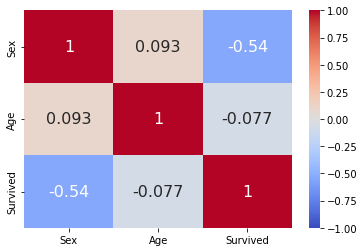

In [61]:
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size':16})